<a href="https://colab.research.google.com/github/IbrahimBajwa313/Data-Science/blob/master/Lin_Regression_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
# 2. Load dataset
from google.colab import files
uploaded = files.upload()


df = pd.read_csv("Salary_dataset.csv")

print("Head of dataset:")
print(df.head())


Saving Salary_dataset.csv to Salary_dataset (1).csv
Head of dataset:
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [4]:

print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


In [5]:

print("\nDescription:")
print(df.describe())


Description:
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000


In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [14]:
df.duplicated().sum()

np.int64(0)

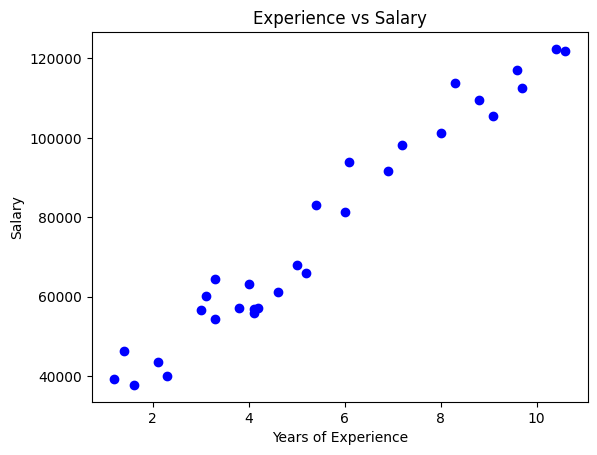

In [15]:
# 3. Visualization
plt.scatter(df["YearsExperience"], df["Salary"], color="blue")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

In [16]:
# 4. Data Cleaning
print("Missing values:\n", df.isnull().sum())
df.drop_duplicates(inplace=True)

# 5. Split dataset
X = df[["YearsExperience"]].values  # Independent variable
y = df["Salary"].values

Missing values:
 Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# 6. Apply Scikit-learn Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)

print("\nScikit-learn Model:")
print("Slope (coef):", reg.coef_[0])
print("Intercept:", reg.intercept_)

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)




Scikit-learn Model:
Slope (coef): 9423.815323030976
Intercept: 24380.201479473704
MSE: 49830096.855908394
RMSE: 7059.04362190151


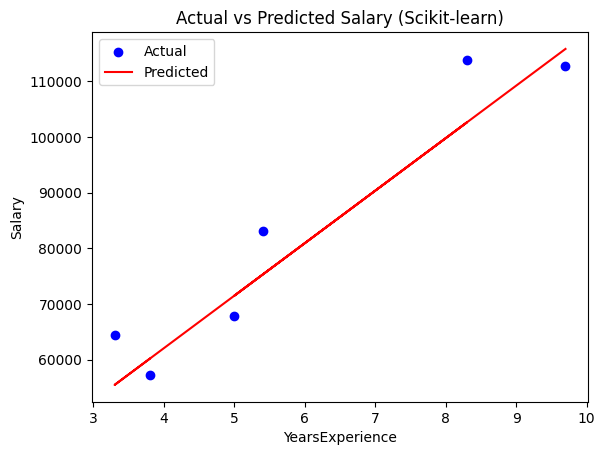

In [25]:
# Visualization - Actual vs Predicted
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red",   label="Predicted")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary (Scikit-learn)")
plt.legend()
plt.show()


In [20]:

# 7. Manually Implement Gradient Descent (1D)
def gradient_descent(x, y, lr=0.01, epochs=1000):
    n = len(x)
    m = 0  # slope
    b = 0  # intercept
    cost_list = []
    for _ in range(epochs):
        y_pred = m*x + b
        error = y - y_pred
        cost = (error**2).mean()
        cost_list.append(cost)
        m_grad = -(2/n) * sum(x * error)
        b_grad = -(2/n) * sum(error)
        m -= lr * m_grad
        b -= lr * b_grad
    return m, b, cost_list


In [21]:
# Flatten X_train for 1D gradient descent
X_vals = X_train.flatten()
y_vals = y_train.flatten()

m, b, costs = gradient_descent(X_vals, y_vals, lr=0.01, epochs=1000)
print("\nManual Gradient Descent Model:")
print("Slope:", m)
print("Intercept:", b)



Manual Gradient Descent Model:
Slope: 9460.77165814474
Intercept: 24128.34200600421


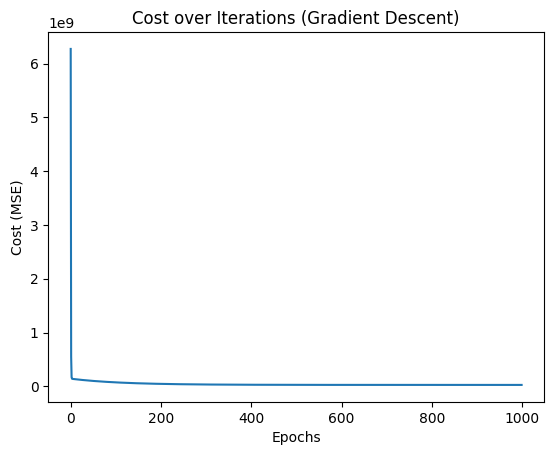

In [22]:
# Plot cost function over iterations
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Cost over Iterations (Gradient Descent)")
plt.show()

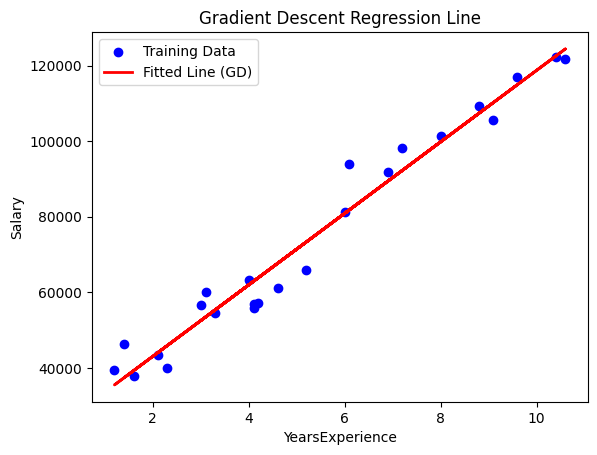

In [23]:
# Visualization - Gradient Descent fitted line
plt.scatter(X_vals, y_vals, color="blue", label="Training Data")
plt.plot(X_vals, m*X_vals+b, color="red", linewidth=2, label="Fitted Line (GD)")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Gradient Descent Regression Line")
plt.legend()
plt.show()

In [24]:
# 8. Compare Scikit-learn vs Manual Gradient Descent
print("\nComparison:")
print("Sklearn slope:", reg.coef_[0], "intercept:", reg.intercept_)
print("Manual GD slope:", m, "intercept:", b)


Comparison:
Sklearn slope: 9423.815323030976 intercept: 24380.201479473704
Manual GD slope: 9460.77165814474 intercept: 24128.34200600421
